<a href="https://colab.research.google.com/github/Evely90/SharkAttack/blob/main/Shark_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shark Attack

## Introduction

In this notebook, the following questions will be analyzed:

1. What are the most dangerous types of sharks to humans?
2. Are children more likely to be attacked by sharks?
3. Are shark attacks where sharks were provoked more or less dangerous?
4. Are certain activities more likely to result in a shark attack?

Before answering these questions, the dataset will be explored to understand its contents, identify any missing data, and determine if any adjustments are necessary.


## Exploring data

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import matplotlib.image as mpimg
from PIL import Image
import io
import requests
%reload_ext google.colab.data_table

# import csv
df = pd.read_csv('https://raw.githubusercontent.com/eevee90/SharkAttack/main/attacks.csv', encoding='latin1')
# Source of the csv: https://www.kaggle.com/felipeesc/shark-attack-dataset

In [257]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

There are a lot of columns that aren't needed, and also there are loads of missing values. To make everything more clear, the columns that aren't needed will be dropped. The columns that ARE possibly needed, are:

**1. What are the most dangerous types of sharks to humans?** 'Fatal (Y/N)' / 'Species' / 'Injury'

**2. Are children more likely to be attacked by sharks?** 'Age' / 'Fatal (Y/N)' / 'Injury'

**3. Are shark attacks where sharks were provoked more or less dangerous?** 'Type' / 'Fatal (Y/N)' / 'Injury'

**4. Are certain activities more likely to result in a shark attack?** 'Activity' / 'Injury' / 'Fatal (Y/N)'

So columns to keep are: 'Fatal (Y/N)', 'Species', 'Age', 'Type', 'Acitivity' and 'Injury'.

Other than that, to make the data more useful and get insights, the following steps will be taken:
- Rectify column names
- Eliminate rows that have all values missing
- Count the amount of missing values for each column
- Count the amount of unique values and what those values are for each column.

In [259]:
# Dropping the unnecessary columns
df = df[['Age', 'Type', 'Activity', 'Injury', 'Fatal (Y/N)', 'Species ']]

In [260]:
# Rectify column names
df = df.copy()
df.rename(columns={"Fatal (Y/N)": "Fatal", "Species ": "Species"}, inplace=True)
df.columns

Index(['Age', 'Type', 'Activity', 'Injury', 'Fatal', 'Species'], dtype='object')

In [261]:
# Drop all rows that have all values missing.
df = df.dropna(how="all")
# We went from 25723 rows to 6302 rows

In [262]:
# Find out how many missing values there are in each column
def missing_values(df):
    for col in df:
      total_rows = len(df)
      null_count = df[col].isnull().sum()
      null_percentage = (null_count / total_rows) * 100
      print(f"Column: '{col}' | Count: {null_count} | Percentage: {null_percentage:.2f}%")

missing_values(df)

Column: 'Age' | Count: 2831 | Percentage: 44.92%
Column: 'Type' | Count: 4 | Percentage: 0.06%
Column: 'Activity' | Count: 544 | Percentage: 8.63%
Column: 'Injury' | Count: 28 | Percentage: 0.44%
Column: 'Fatal' | Count: 539 | Percentage: 8.55%
Column: 'Species' | Count: 2838 | Percentage: 45.03%


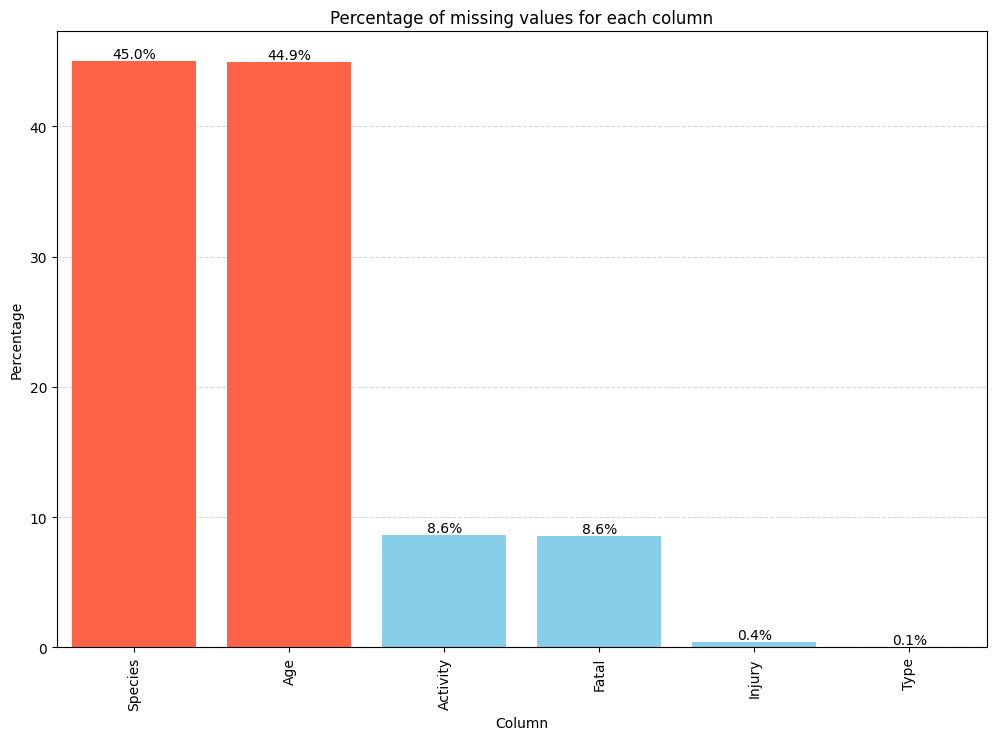

In [263]:
# Vertical bar chart to display the percentage of missing values
percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 8))
percentage.plot(kind='bar')
bar_container = ax.bar(percentage.index, percentage, color=['tomato' if x >= 10 else 'skyblue' for x in percentage], zorder=2)
plt.xlabel('Column')
plt.ylabel('Percentage')
plt.title('Percentage of missing values for each column')
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=1)
ax.bar_label(bar_container, fmt='{:,.1f}%')
plt.show()

In [264]:
# Find the number of unique values for each column
def display_unique_values(df):
    for col in df.columns:
        unique_vals = df[col].value_counts()
        print(f"Column: '{col}' | Unique values count: {len(unique_vals)}")
        print(f"{unique_vals.head(10)}\n")

display_unique_values(df)

Column: 'Age' | Unique values count: 157
17    154
18    150
19    142
20    141
15    139
16    138
21    119
22    117
25    108
24    106
Name: Age, dtype: int64

Column: 'Type' | Unique values count: 8
Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

Column: 'Activity' | Unique values count: 1532
Surfing         971
Swimming        869
Fishing         431
Spearfishing    333
Bathing         162
Wading          149
Diving          127
Standing         99
Snorkeling       89
Scuba diving     76
Name: Activity, dtype: int64

Column: 'Injury' | Unique values count: 3737
FATAL                      802
Survived                    97
Foot bitten                 87
No injury                   82
Leg bitten                  72
Left foot bitten            50
No details                  43
Right foot bitten           39
No injury, board bitten     31

## 1. What are the most dangerous types of sharks to humans?


To answer this question, let's operationalize the concept of 'dangerous' in different ways:
1. Frequency of attacks: The shark species that has been involved in the most attacks, whether fatal or non-fatal, could be considered the most dangerous

2. Fatal attacks: Alternatively, the focus can be specifically on fatal attacks and determining which shark species is responsible for the most fatalities.

3. Injury severity: Another approach could involve ranking the severity of injuries resulting from shark attacks, with fatal attacks considered the most severe. This approach might be challenging due to the subjectivity of injury severity: is a bitten foot more severe than a bitten hand? So let's focus on the first two approaches and see if they yield similar results.

Steps to take for the first approach:

* Clean up the 'Species' column, as it contains 1549 unique values while there probably aren't that many shark species.
* Filter out rows with null values in the 'Species' column.
* Create a chart to visualize the outcomes.

Steps to take for the second approach:

* Filter out rows with null values in the 'Fatal' column.
* Clean up the 'Fatal' column.
* Create a chart to visualize the outcomes.

In [265]:
# Display the first and last 10 unique values to explore the 'Species' column
# to be able to clean it up.
df_q1 = df.copy()
species_counts = df_q1['Species'].value_counts()
print(pd.concat([species_counts.head(10), species_counts.tail(10)]))

White shark                                                                                                                      163
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   88
Tiger shark                                                                                                                       73
Shark involvement prior to death unconfirmed                                                                                      68
Bull shark                                                                                                                        52
6' shark                                                             

In [266]:
# Cleaning up the data:
# Make all values that contain 'white shark' amongst other information to be 'white shark',
# all values that contain 'tiger shark' amongst other information to be 'tiger shark', etc...

# Extract species names using str.extract() method
df_q1['Species'] = df_q1['Species'].str.extract(r'(?:\s+)?(\w{2,}) shark', flags=re.IGNORECASE)

# Capitalize the first letter of each species name and append 'shark'
df_q1['Species'] = df_q1['Species'].str.capitalize() + ' shark'

# Display the first and last 10 unique species and their counts
print(df_q1['Species'].value_counts().head(10))
print(df_q1['Species'].value_counts().tail(10))

# Drop the null values
df_q1.dropna(subset=['Species'], inplace=True)

# Display the total count of unique species
unique_species_count = len(df_q1['Species'].unique())
print(f"\nTotal Count of unique Species: {unique_species_count}\n")
print(f"All unique values: {df_q1['Species'].unique()}")

White shark        634
Tiger shark        260
Bull shark         177
Nurse shark         97
Whaler shark        66
Reef shark          66
Blacktip shark      62
Small shark         55
Mako shark          53
Wobbegong shark     46
Name: Species, dtype: int64
Cutter shark     1
Jackson shark    1
Soupfin shark    1
50 shark         1
Gray shark       1
For shark        1
Red shark        1
Banjo shark      1
Hooked shark     1
Tipped shark     1
Name: Species, dtype: int64

Total Count of unique Species: 95

All unique values: ['White shark' 'Tiger shark' 'Lemon shark' 'Bull shark' 'Reef shark'
 'Nurse shark' 'Wobbegong shark' 'Blacktip shark' 'Galapagos shark'
 '2m shark' 'Small shark' 'Blue shark' 'Cookiecutter shark'
 'Spinner shark' 'Whitetip shark' 'Sandtiger shark' 'No shark'
 'Gill shark' '3m shark' 'Sevengill shark' 'Angel shark' 'Dogfish shark'
 'Mako shark' 'Whaler shark' 'Silky shark' 'Juvenile shark'
 'Hammerhead shark' 'But shark' 'Foot shark' 'Raggedtooth shark'
 'Goblin sh

In [267]:
# Check whether the null values of 'Species' have been dropped correctly
missing_values(df_q1)

Column: 'Age' | Count: 695 | Percentage: 33.69%
Column: 'Type' | Count: 0 | Percentage: 0.00%
Column: 'Activity' | Count: 84 | Percentage: 4.07%
Column: 'Injury' | Count: 4 | Percentage: 0.19%
Column: 'Fatal' | Count: 43 | Percentage: 2.08%
Column: 'Species' | Count: 0 | Percentage: 0.00%


While 95 species are identified, there are still occurrences of values that seem unrelated to actual shark species, such as '50 shark' or 'for shark'. Additionally, there might be spelling mistakes that aren't accounted for. These factors could lead to potential underestimations in the counts of certain species. Consequently, there might be slight variations in the ranking of species, particularly those with similar counts, which could affect the top 5-10 rankings. However, it's unlikely to alter the top 3. Let's create a chart to visualize the three shark species with the highest number of recorded attacks.

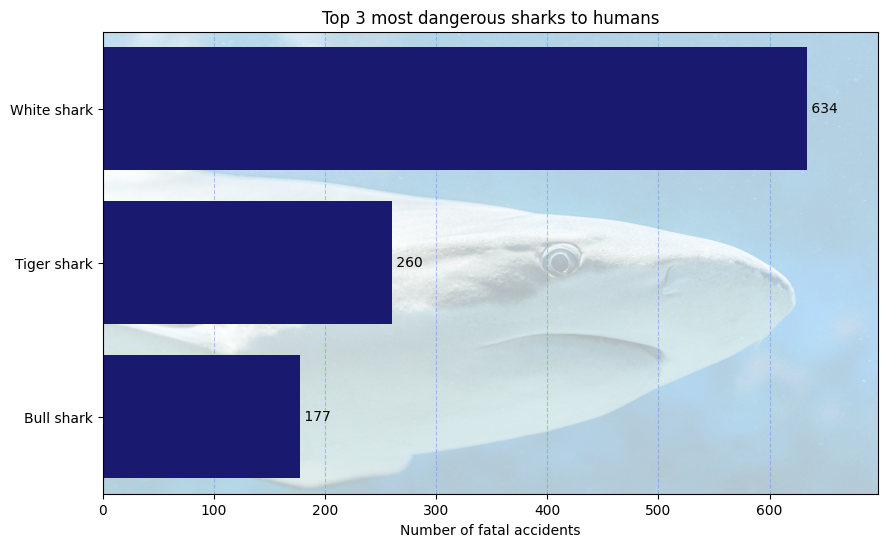

In [268]:
top_three = df_q1['Species'].value_counts().head(3) # Get the top 3 most occuring species
top_three = top_three.iloc[::-1] # Reverse order so the most occuring species are on top of the chart

# load background image. Probably not a common/recommended practice, but I'm new to this so I just want to play around with cool options and don't care for now
url = 'https://cdn.pixabay.com/photo/2021/03/24/19/07/shark-6121088_1280.jpg'
response = requests.get(url)
img = Image.open(io.BytesIO(response.content))
img = img.transpose(Image.FLIP_LEFT_RIGHT)

# Create a plot with the background image
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img, aspect='auto', extent=[0, top_three.max() * 1.1, -0.5, 2.5], alpha=0.3)

# Add bars horizontally with species on y-axis and counts on x-axis
bar_container = ax.barh(top_three.index, top_three.values, color='midnightblue', zorder=2)
plt.xlabel('Number of fatal accidents')
plt.title('Top 3 most dangerous sharks to humans')
ax.bar_label(bar_container, fmt=' {:,.0f}')
plt.grid(axis='x', linestyle='--', alpha=0.5, color='cornflowerblue', zorder=1)
plt.show()

In [269]:
# Display all unique values of 'Fatal' to clean it
# Get the value counts of 'Fatal'
df_q1['Fatal'].value_counts()

N          1687
Y           315
UNKNOWN      13
 N            3
M             1
2017          1
Name: Fatal, dtype: int64

In [270]:
# Change and drop values in 'Fatal' column
# Replace 'Y' with True and 'N' with False
df_q1.loc[:, 'Fatal'] = df_q1['Fatal'].replace({'Y': True, 'N': False, ' N': False})

# Remove rows with invalid entries in the 'Fatal' column
invalid_entries = ['M', '2017', 'UNKNOWN']
df_q1 = df_q1.loc[~df_q1['Fatal'].isin(invalid_entries)]

# Convert the 'Fatal' column to boolean type
df_q1.loc[:, 'Fatal'] = df_q1['Fatal'].astype(bool)

# Drop null values
df_q1.dropna(subset=['Fatal'], inplace=True)

# Check the new values
df_q1['Fatal'].value_counts()


<ipython-input-270-e6d838493530>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1.loc[:, 'Fatal'] = df_q1['Fatal'].astype(bool)
<ipython-input-270-e6d838493530>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_q1.loc[:, 'Fatal'] = df_q1['Fatal'].astype(bool)
<ipython-input-270-e6d838493530>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

False    1690
True      358
Name: Fatal, dtype: int64

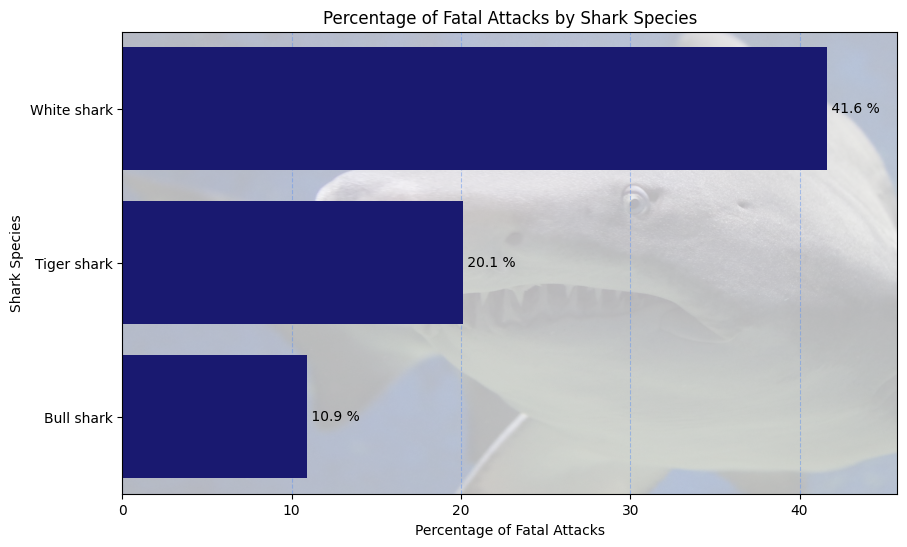

In [271]:
# Filter the DataFrame to include only fatal attacks
fatal_attacks = df_q1[df_q1['Fatal']]

# Group the data by the 'Species' column and count the number of fatal attacks for each species
fatal_counts = fatal_attacks['Species'].value_counts().head(3)

# Calculate the percentage of fatal attacks for each species
total_fatal_attacks = fatal_attacks.shape[0]
fatal_percentage = (fatal_counts / total_fatal_attacks) * 100
fatal_percentage = fatal_percentage.iloc[::-1] # Reverse order so I get the most occuring species on top of the chart

# # load another background image because cool.
url = 'https://cdn.pixabay.com/photo/2015/03/15/19/05/shark-674867_1280.jpg'
response = requests.get(url)
img = Image.open(io.BytesIO(response.content))
img = img.transpose(Image.FLIP_LEFT_RIGHT)

# Plot the percentage of fatal attacks for each species in a chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img, aspect='auto', extent=[0, fatal_percentage.max() * 1.1, -0.5, 2.5], alpha=0.3)

# add bars horizontally with species on y-axis and counts on x-axis
bar_container = ax.barh(fatal_percentage.index, fatal_percentage.values, color="midnightblue", zorder=2)

plt.xlabel('Percentage of Fatal Attacks')
plt.ylabel('Shark Species')
plt.title('Percentage of Fatal Attacks by Shark Species')
ax.bar_label(bar_container, fmt=' {:,.1f} %')
plt.grid(axis='x', linestyle='--', alpha=0.5, color='cornflowerblue', zorder=1)
plt.show()

So to answer the first question:

**What are the most dangerous types of sharks to humans?**

The white shark, tiger shark, and bull shark are considered the most dangerous shark species to humans, with the white shark being the most notorious. These three species are responsible for both the highest number of attacks and the highest percentage of fatal attacks on humans.

Among them, the white shark stands out as the most fatal, accounting for 41.6% of all fatal attacks. Following closely is the tiger shark, responsible for 20.1% of fatal attacks, and the bull shark, which accounts for 10.9% of fatal attacks. Beyond these three species, determining a reliable top 5 or top 10 becomes challenging due to the messy and unclear nature of the data.

## 2. Are children more likely to be attacked by sharks?

To answer this question, it's essential to establish a clear definition of "children." For the purposes of this analysis, "children" will be defined as individuals under the age of 18. Additionally, we may consider a subgroup of "young children," defined as those aged 14 and below.

Steps to take:
- Filtering out null values in the 'Age' and 'Fatal' column to ensure the data used is complete and reliable.
- Cleaning the 'Age' column to include only rows with unambiguous age numbers, removing any inconsistencies or non-numeric entries.
- Cleaning the 'Fatal' column to determine if children experience fatal attacks at a different rate compared to adults.

In [272]:
# Drop missing values of 'Age'.
df_q2 = df.copy()
df_q2.dropna(subset=['Age'], inplace=True)
missing_values(df_q2)

Column: 'Age' | Count: 0 | Percentage: 0.00%
Column: 'Type' | Count: 1 | Percentage: 0.03%
Column: 'Activity' | Count: 142 | Percentage: 4.09%
Column: 'Injury' | Count: 5 | Percentage: 0.14%
Column: 'Fatal' | Count: 227 | Percentage: 6.54%
Column: 'Species' | Count: 1278 | Percentage: 36.82%


In [273]:
# Display all unique values of 'Age' to clean it
# Get the value counts of 'Age'
df_q2['Age'].unique()

array(['57', '11', '48', '18', '52', '15', '12', '32', '10', '21', '34',
       '30', '60', '33', '29', '54', '41', '37', '56', '19', '25', '69',
       '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24', '26',
       '49', '22', '7', '31', '17', '40', '13', '42', '3', '8', '50',
       '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen', '47',
       '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6', '27',
       '64', '23', '71', '44', '62', '63', '70', '18 months', '53', '30s',
       '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
       

In [274]:
# Filter the DataFrame based on the 'Age' column by attempting to cast it to integers
df_q2 = df_q2.loc[df_q2['Age'].astype(str).str.isdigit()]

# Convert the 'Age' column to integers
df_q2.loc[:, 'Age'] = df_q2['Age'].astype(int)

# Display the filtered DataFrame
df_q2['Age'].unique()

<ipython-input-274-8401157c6812>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_q2.loc[:, 'Age'] = df_q2['Age'].astype(int)


array([57, 11, 48, 18, 52, 15, 12, 32, 10, 21, 34, 30, 60, 33, 29, 54, 41,
       37, 56, 19, 25, 69, 38, 55, 35, 46, 45, 14, 28, 20, 24, 26, 49, 22,
        7, 31, 17, 40, 13, 42,  3,  8, 50, 16, 82, 73, 68, 51, 39, 58, 47,
       61, 65, 36, 66, 43,  9, 72, 59,  6, 27, 64, 23, 71, 44, 62, 63, 70,
       53, 77, 74,  5, 86, 84, 75, 87, 67,  1, 81, 78])

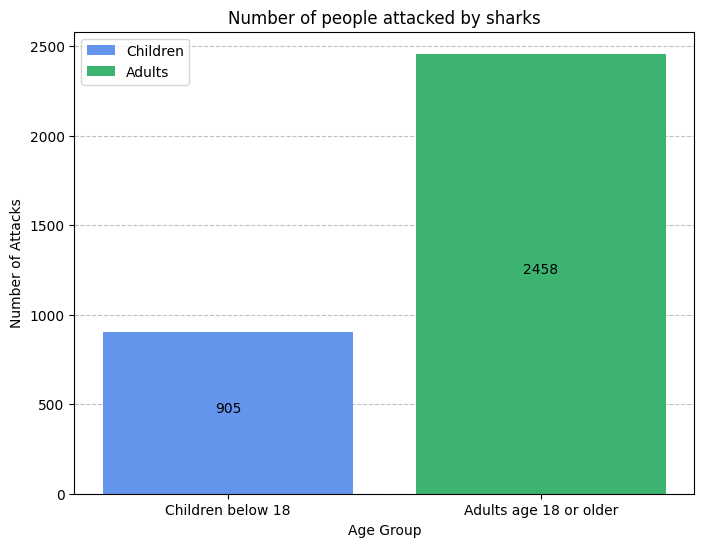

In [275]:
# Filter the DataFrame to separate children and adults
children = df_q2[df_q2['Age'] < 18]
adults = df_q2[df_q2['Age'] >= 18]

# Count the number of attacks
children_attacks = children.shape[0]
adults_attacks = adults.shape[0]

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['Children below 18'], [children_attacks], color='#6495ED', label='Children', zorder=2)
ax.bar(['Adults age 18 or older'], [adults_attacks], color='#3CB371', label='Adults', zorder=2)

ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of people attacked by sharks')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5, color='grey', zorder=1)

# Add labels to the bars
for bars in [ax.patches]:
    for bar in bars:
        height = bar.get_height()
        y_pos = bar.get_y() + height / 2  # Calculate the y-coordinate of the middle of each bar
        ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, y_pos),
                    xytext=(0, 3),  # Vertical offset
                    textcoords="offset points", ha='center', va='center')  # Center the text vertically

plt.show()


In [276]:
# Dropping null values in the 'Fatal' column
df_q2.dropna(subset=['Fatal'], inplace=True)

In [277]:
# Display all unique values of 'Fatal' to clean it
# Get the value counts of 'Fatal'
df_q2['Fatal'].value_counts()

N          2537
Y           592
UNKNOWN      10
 N            6
M             1
2017          1
Name: Fatal, dtype: int64

In [278]:
# Change and drop values in 'Fatal' column
# Replace 'Y' with True and ' N' with False
df_q2.loc[:, 'Fatal'] = df_q2['Fatal'].replace({'Y': True, 'N': False, ' N': False})

# Remove rows with invalid entries in the 'Fatal' column
invalid_entries = ['M', '2017', 'UNKNOWN']
df_q2 = df_q2[~df_q2['Fatal'].isin(invalid_entries)]

# Convert the 'Fatal' column to boolean type
df_q2.loc[:, 'Fatal'] = df_q2['Fatal'].astype(bool)

# Display the value counts of 'Fatal'
df_q2['Fatal'].value_counts()

<ipython-input-278-afe7beebd658>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q2.loc[:, 'Fatal'] = df_q2['Fatal'].astype(bool)
<ipython-input-278-afe7beebd658>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_q2.loc[:, 'Fatal'] = df_q2['Fatal'].astype(bool)


False    2543
True      592
Name: Fatal, dtype: int64

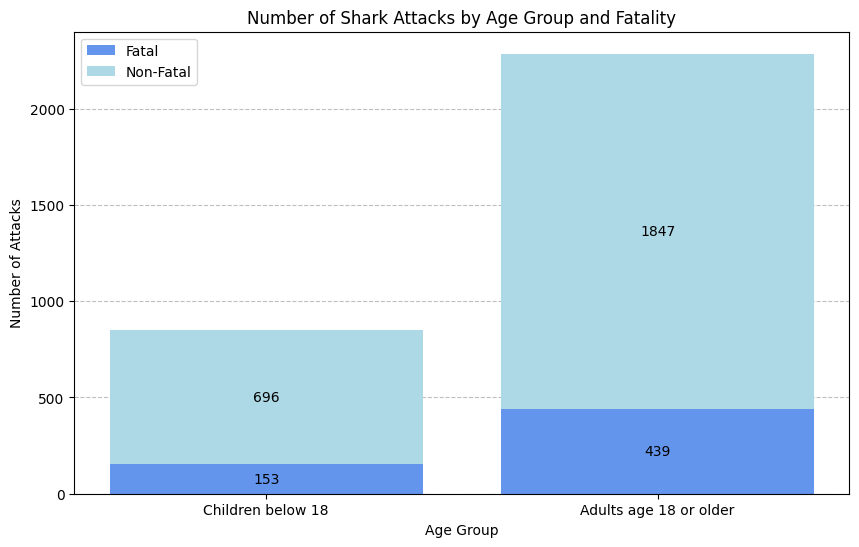

In [279]:
# Filter the DataFrame to separate children and adults
children = df_q2[df_q2['Age'] < 18]
adults = df_q2[df_q2['Age'] >= 18]

# Count the number of fatal and non-fatal attacks for children and adults
children_fatal = children['Fatal'].sum()
children_non_fatal = (~children['Fatal']).sum()
adults_fatal = adults['Fatal'].sum()
adults_non_fatal = (~adults['Fatal']).sum()

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(['Children below 18'], [children_fatal], color='#6495ED', label='Fatal', zorder=2)
bar2 = ax.bar(['Children below 18'], [children_non_fatal], color='#ADD8E6', bottom=[children_fatal], label='Non-Fatal', zorder=2)
bar3 = ax.bar(['Adults age 18 or older'], [adults_fatal], color='#6495ED', zorder=2)
bar4 = ax.bar(['Adults age 18 or older'], [adults_non_fatal], color='#ADD8E6', bottom=[adults_fatal], zorder=2)
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of Shark Attacks by Age Group and Fatality')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5, color='grey', zorder=1)

# Add labels to the bars
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        y_pos = bar.get_y() + height / 2  # Calculate the y-coordinate of the middle of each part of the stacked bars
        ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, y_pos),
                    xytext=(0, 0),  # No vertical offset
                    textcoords="offset points", ha='center', va='center')

plt.show()

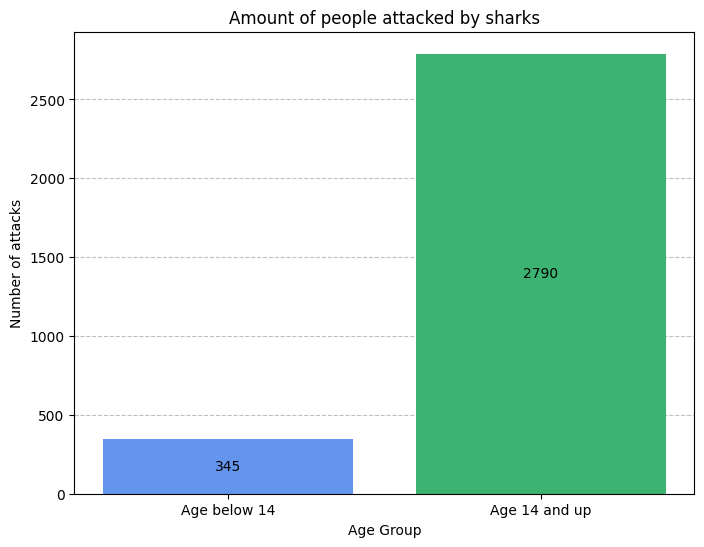

In [280]:
# Filter the DataFrame to separate children under 14
children_14 = df_q2[df_q2['Age'] < 14].shape[0]
adults_above_14 = df_q2[df_q2['Age'] >= 14].shape[0]

# Create a bar chart with an Axes object
fig, ax = plt.subplots(figsize=(8, 6))
bar_container = ax.bar(['Age below 14', 'Age 14 and up'], [children_14, adults_above_14], color=['#6495ED', '#3CB371'], zorder=2)
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of attacks')
ax.set_title('Amount of people attacked by sharks')
ax.grid(axis='y', linestyle='--', alpha=0.5, color='grey', zorder=1)

# Add labels to the bars
for bar in bar_container:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.0f}',
             ha='center', va='center')
plt.show()

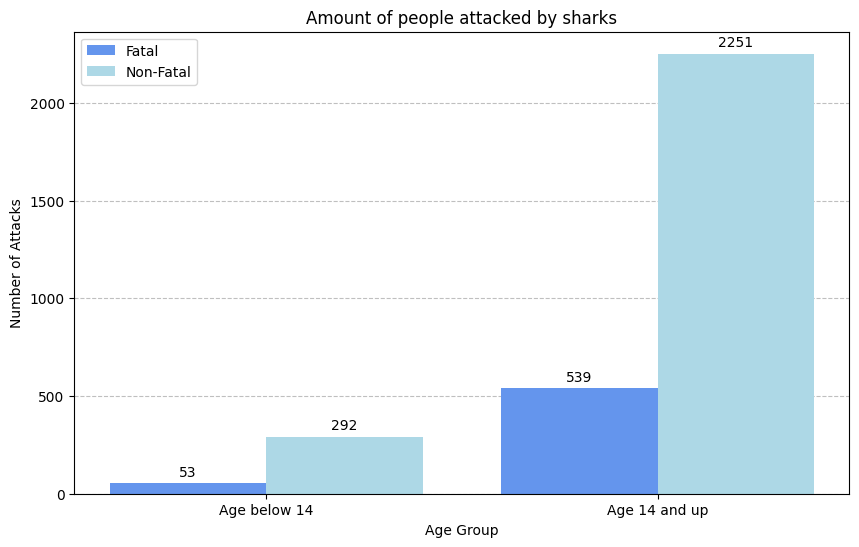

In [281]:
# Filter the DataFrame to separate children and adults
young_children = df_q2[df_q2['Age'] < 14]
older_and_adult = df_q2[df_q2['Age'] >= 14]

# Count the number of fatal and non-fatal attacks for children and adults
young_children_fatal = young_children['Fatal'].sum()
young_children_non_fatal = (~young_children['Fatal']).sum()
older_adults_fatal = older_and_adult['Fatal'].sum()
older_adults_non_fatal = (~older_and_adult['Fatal']).sum()

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4  # Width of each bar
index = np.arange(2)  # Number of age groups

bar1 = ax.bar(index - bar_width / 2, [young_children_fatal, older_adults_fatal], bar_width, color='#6495ED', label='Fatal', zorder=2)
bar2 = ax.bar(index + bar_width / 2, [young_children_non_fatal, older_adults_non_fatal], bar_width, color='#ADD8E6', label='Non-Fatal', zorder=2)

ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Attacks')
ax.set_title('Amount of people attacked by sharks')
ax.set_xticks(index)
ax.set_xticklabels(['Age below 14', 'Age 14 and up'])
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5, color='grey', zorder=1)

# Add labels to the bars
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')

plt.show()

In [282]:
percentage_children_fatal = (young_children_fatal / (young_children_fatal + young_children_non_fatal)) * 100
percentage_adults_fatal = (older_adults_fatal / (older_adults_fatal + older_adults_non_fatal)) * 100
print("Percentage of attacks on children that are fatal: {:.2f}%".format(percentage_children_fatal))
print("Percentage of attacks on adults that are fetal: {:.2f}%".format(percentage_adults_fatal))


Percentage of attacks on children that are fatal: 15.36%
Percentage of attacks on adults that are fetal: 19.32%


To answer the second question:

**Are children more likely to be attacked by sharks?**

No, at first sight, adults are more likely to be attacked by sharks. Also, when adults are attacked, there is a slightly bigger chance the attack is fatal (19%, where on children this chance is 15%).

However, that might be a too quick conclusion as this only considers the absolute likelihood. While there are fewer reported shark attacks among children compared to adults, if the total population of children is significantly smaller than that of adults (which is indeed the case), the relative likelihood of a child being attacked by a shark might be higher.

To explore the relative likelihood, let's consider the population size of children and adults. According to data from [The World Bank](https://data.worldbank.org/indicator/SP.POP.0014.TO.ZS), approximately 25% of the total population is below 14 years old in 2021. With the total world population in 2021 being 7.89 billion (7,890,000,000), the relative likelihood of a child being attacked by sharks can be calculated.

In [283]:
# Calculate the percentages
attacks_children = (345 / 7890000000) * 100
attacks_adults = (2790 / 7890000000) * 100
pd.options.display.float_format = '{:.0f}'.format
print(f'Total percentage of children of the population that is attacked by sharks: {attacks_children}%')
print(f'Total percentage of adults of the population that is attacked by sharks: {attacks_adults}%')

Total percentage of children of the population that is attacked by sharks: 4.3726235741444865e-06%
Total percentage of adults of the population that is attacked by sharks: 3.5361216730038026e-05%


"While the data suggests that, relatively speaking, children are more susceptible to shark attacks, several factors should be considered to accurately interpret this information:
- Data completeness: The dataset may not represent all shark attacks globally. Variations could exist due to missing data from certain geographical regions or inconsistencies in reporting.
- Reporting bias: Certain attacks may be more likely to be reported, regardless of whether children are involved, leading to potential biases in the dataset.
- Data integrity: Only records with clear age numbers were included, potentially omitting attacks where the age of the victim was not specified.
- Activity Participation: Children may participate more or less frequently in activities that provoke shark attacks compared to adults. Factors such as beach activities or water sports could influence exposure levels.
- Behavioral Differences: Behavioral differences between children and adults, such as awareness of potential dangers or adherence to safety measures during activities, may also impact attack rates.

Given these considerations, providing a definitive explanation for if and why children are more or less prone to shark attacks remains challenging.

## 3. Are shark attacks where sharks were provoked more or less dangerous?

To answer this question, it's needed to make a clear definition of 'more or less dangerous'. In this context 'dangerous' means fatal. Therefore, a shark attack is considered more 'dangerous' if the attack was fatal. Because, again, it's hard to rank injuries based on severity.

So if there is a correlation between provoked sharks and fatal attacks, then attacks where sharks were provoked are more dangerous.
We need however to take into consideration that we don't have reported incidents in our data of sharks that were provoked but didn't attack.

Steps to take:
- Clean up the 'Fatal' column again the same way as before.
- Clean up the 'Type' column.
- Create a chart to visualize the outcomes.

In [284]:
# Copying the original dataframe again
# Also drop all rows with empty values in 'Type' or 'Fatal'.
df_q3 = df.copy()
df_q3.dropna(subset=['Type', 'Fatal'], inplace=True)
missing_values(df_q3)

Column: 'Age' | Count: 2516 | Percentage: 43.68%
Column: 'Type' | Count: 0 | Percentage: 0.00%
Column: 'Activity' | Count: 419 | Percentage: 7.27%
Column: 'Injury' | Count: 21 | Percentage: 0.36%
Column: 'Fatal' | Count: 0 | Percentage: 0.00%
Column: 'Species' | Count: 2812 | Percentage: 48.82%


In [285]:
# So again, change and drop values in 'Fatal' column
# Replace 'Y' with True and ' N' with False
df_q3['Fatal'] = df_q3['Fatal'].replace({'Y': True, 'N': False, ' N': False})

# Remove rows with invalid entries in the 'Fatal' column
invalid_entries = ['M', '2017', 'UNKNOWN']
df_q3 = df_q3[~df_q3['Fatal'].isin(invalid_entries)]

# Convert the 'Fatal' column to boolean type
df_q3['Fatal'] = df_q3['Fatal'].astype(bool)

# Display the value counts of 'Fatal'
df_q3['Fatal'].value_counts()

False    4299
True     1388
Name: Fatal, dtype: int64

In [286]:
# View the values of the 'Type' column
df_q3['Type'].value_counts()

Unprovoked      4532
Provoked         567
Sea Disaster     234
Boating          196
Boat             133
Invalid           22
Questionable       2
Boatomg            1
Name: Type, dtype: int64

There are some values that aren't categorized as 'Provoked' or 'Unprovoked' but still have a lot of occurrences. Let's categorize them:
- 'Sea Disaster': This can be categorized as 'unprovoked', as those are disasters and not intentionally provoked behaviour.
- 'Boating' / 'Boat': According to [ISAF](https://www.floridamuseum.ufl.edu/shark-attacks/about/isaf-case-classifications/), bites on boats can be either provoked or unprovoked, depending on if there is baited fishing involved. As this is not clear, these cases won't be used for the analysis.
- 'Invalid': These can't be categorized so those won't be used for the analysis.
- 'Questionable': These can't be categorized so those won't be used for the analysis.
- 'Boatomg': This is probably a typo and should be 'Boating'.


In [287]:
# Replace 'Sea Disaster' with 'Unprovoked' in the 'Type' column
df_q3['Type'] = df_q3['Type'].replace({'Sea Disaster': 'Unprovoked'})

# Remove unclear rows in the 'Type' column
unclear_entries = ['Boating', 'Boat', 'Invalid', 'Questionable', 'Boatomg']
df_q3 = df_q3[~df_q3['Type'].isin(unclear_entries)]

# View the values of the 'Type' column
df_q3['Type'].value_counts()

Unprovoked    4766
Provoked       567
Name: Type, dtype: int64

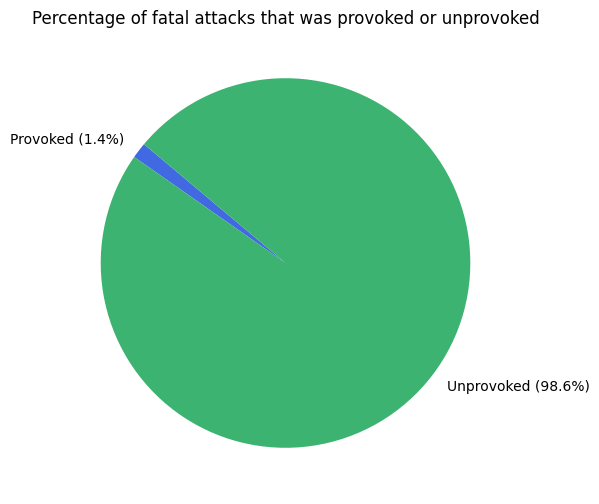

In [288]:
# Filter the DataFrame to include only fatal attacks
fatal_attacks = df_q3[df_q3['Fatal']]

# Count the number of fatal attacks that are provoked and unprovoked
provoked_fatal = fatal_attacks[fatal_attacks['Type'] == 'Provoked'].shape[0]
unprovoked_fatal = fatal_attacks[fatal_attacks['Type'] == 'Unprovoked'].shape[0]

# Create a pie chart with custom labels
fig, ax = plt.subplots(figsize=(8, 6))
labels = ['Provoked', 'Unprovoked']
sizes = [provoked_fatal, unprovoked_fatal]
colors = ['#4169E1', '#3CB371']

# Generate custom labels with percentage values
percentages = [f'{label} ({size/sum(sizes)*100:.1f}%)' for label, size in zip(labels, sizes)]

# Plot the pie chart with custom labels
ax.pie(sizes, labels=percentages, colors=colors, startangle=140)
ax.set_title('Percentage of fatal attacks that was provoked or unprovoked')
plt.show()



So to answer the third question:

**Are shark attacks where sharks were provoked more or less dangerous?**

Shark attacks where sharks were provoked are less dangerous. Most fatal attacks occur when sharks are unprovoked.

## 4. Are certain activities more likely to result in a shark attack?

To answer this question, the activities individuals were engaged in at the time of a shark attack need to be identified. Whether the attack was fetal or not, is irrelevant in this case.

Steps to take:

- Remove all rows with missing values in the 'Activities' column, as they cannot be used.
- Organize the 'Activities' column into distinct categories.There are 1532 unique activities. Let's see if they can be categorized in some way.
- Create a ranking chart of what activities are most commonly associated with shark attacks.

In [289]:
# Copying the original dataframe again
# Drop all rows with empty values in 'Activity'
df_q4 = df.copy()
df_q4.dropna(subset=['Activity'], inplace=True)
missing_values(df_q4)

Column: 'Age' | Count: 2429 | Percentage: 42.18%
Column: 'Type' | Count: 4 | Percentage: 0.07%
Column: 'Activity' | Count: 0 | Percentage: 0.00%
Column: 'Injury' | Count: 16 | Percentage: 0.28%
Column: 'Fatal' | Count: 414 | Percentage: 7.19%
Column: 'Species' | Count: 2523 | Percentage: 43.82%


In [290]:
# Get the counts of each activity in descending order
activities = df_q4['Activity'].value_counts(ascending=False)

# Get the top 25 activities by count
top_30_activities = activities.head(25)

# Display the top 25 activities
print(top_30_activities)

Surfing            971
Swimming           869
Fishing            431
Spearfishing       333
Bathing            162
Wading             149
Diving             127
Standing            99
Snorkeling          89
Scuba diving        76
Body boarding       61
Body surfing        49
Swimming            47
Kayaking            33
Treading water      32
Pearl diving        32
Fell overboard      32
Free diving         29
Boogie boarding     29
Windsurfing         19
Walking             17
Boogie Boarding     16
Shark fishing       15
Floating            14
Fishing             13
Name: Activity, dtype: int64


In [291]:
# Convert all characters to lowercase
df_q4['Activity'] = df_q4['Activity'].str.lower()

# Replace activities containing 'Surf' with 'Surfing'
df_q4.loc[df_q4['Activity'].str.contains('surf'), 'Activity'] = 'Surfing'
df_q4.loc[df_q4['Activity'].str.contains('board'), 'Activity'] = 'Surfing'

# Replace activities containing 'Fishing' with 'Fishing' except for 'Spearfishing'
df_q4.loc[df_q4['Activity'].str.contains('fishing'), 'Activity'] = 'Fishing'

# Replace activities containing 'Spearfishing' with 'Spearfishing'
df_q4.loc[df_q4['Activity'].str.contains('spearfishing'), 'Activity'] = 'Spearfishing'

# Replace activities containing 'Diving' with 'Diving'
df_q4.loc[df_q4['Activity'].str.contains('diving'), 'Activity'] = 'Diving'

# Replace activities containing 'Swimming' with 'Swimming'
df_q4.loc[df_q4['Activity'].str.contains('swimming'), 'Activity'] = 'Swimming'

# Replace activities containing that fall into 'Boating' category with 'Boating'
df_q4.loc[df_q4['Activity'].str.contains('boat')] = 'Boating'
df_q4.loc[df_q4['Activity'].str.contains('kayaking')] = 'Boating'
df_q4.loc[df_q4['Activity'].str.contains('canoeing')] = 'Boating'
df_q4.loc[df_q4['Activity'].str.contains('rowing')] = 'Boating'
df_q4.loc[df_q4['Activity'].str.contains('sailing')] = 'Boating'

# Capitalize the first letter of each row
df_q4['Activity'] = df_q4['Activity'].str.capitalize()

# Display the first 30 modified activities
print(df_q4['Activity'].value_counts().head(10))

Surfing           1562
Fishing           1125
Swimming          1074
Diving             511
Boating            177
Bathing            162
Wading             149
Standing            99
Snorkeling          89
Treading water      32
Name: Activity, dtype: int64


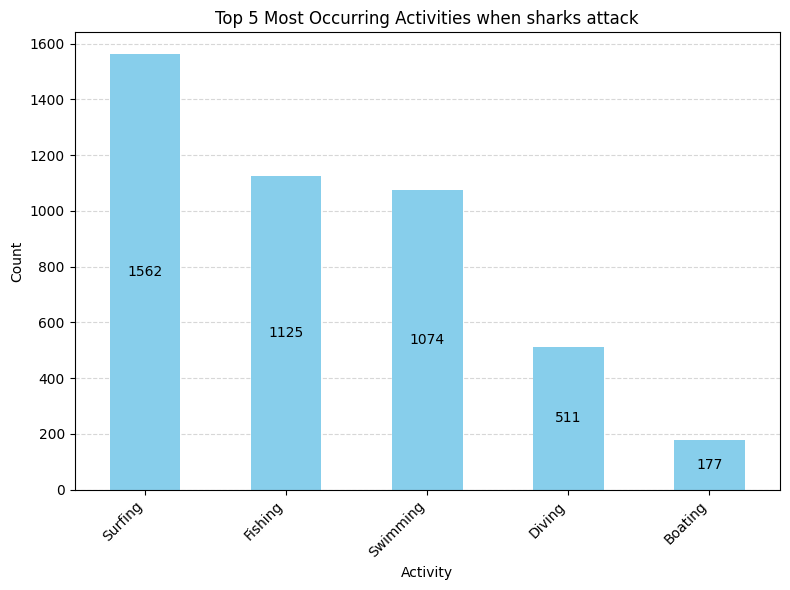

In [292]:
# Make vertical bar chart to display the most dangerous activities
activity_count = df_q4['Activity'].value_counts().head(5)

# Plot a bar chart
plt.figure(figsize=(8, 6))
bar_container = activity_count.plot(kind='bar', color='skyblue', zorder=2)
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Top 5 Most Occurring Activities when sharks attack')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=1)

# Add labels to the bars
for i, count in enumerate(activity_count):
    plt.text(i, count/2, str(count), ha='center', va='center')

plt.tight_layout()
plt.show()


So to answer the fourth question:

**4. Are certain activities more likely to result in a shark attack?**

Yes, there are certain activities that are more likely to result in a shark attack. Surfing is the number 1 activity that is likely to result in a shark attack. Also fishing, swimming, diving and boating are in the top 5 of activities that resulted in a shark attack.